In [1]:
%matplotlib inline
from pyleecan.Functions.save import save
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from util.toyota_prius_generator import Toyota_Prius_Generator

from pyleecan.Classes.MachineIPMSM import MachineIPMSM
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.OPdq import OPdq
from pyleecan.Classes.MagFEMM import MagFEMM
from pyleecan.Classes.InputCurrent import InputCurrent
import matplotlib.pyplot as plt
from numpy import sqrt
from os import makedirs
from os.path import join
# Load the machine
from util.simulation import *
from util.failures import *
from IPython.display import display, HTML

C:\Users\Dell\AppData\Local\Programs\Python\Python310\Lib\site-packages\shiboken2\files.dir\shibokensupport\__feature__.py:142: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.1)
  return original_import(name, *args, **kwargs)


In [2]:
save_dir = "machines_custom_geom1"
makedirs(save_dir, exist_ok=True)

In [3]:
# Variante géométrique avec Ntcoil constant 
def create_geo_variant(name, stator_H0, stator_W0, rotor_H0, rotor_W0):
    gen = Toyota_Prius_Generator(Ntcoil=90)  # Ntcoil constant

    stator = gen.create_stator()
    rotor = gen.create_rotor()

    # Modifications  de géométriques
    stator.slot.H0 = stator_H0
    stator.slot.W0 = stator_W0
    rotor.hole[0].H0 = rotor_H0
    rotor.hole[0].W0 = rotor_W0

    machine = MachineIPMSM(
        name=name,
        stator=stator,
        rotor=rotor,
        shaft=gen.create_shaft()
    )
    return machine

#differents types de variantes
variants = [
    ("Toyota_Prius_geo1", 0.0013, 0.0018, 0.0110, 0.043),
    ("Toyota_Prius_geo2", 0.0014, 0.0017, 0.0120, 0.044),
    ("Toyota_Prius_geo3", 0.0012, 0.0020, 0.0105, 0.045),
]

# Sauvegarde
save_dir = "machines_custom_geom1"

for name, H0s, W0s, H0r, W0r in variants:
    machine = create_geo_variant(name, H0s, W0s, H0r, W0r)
    save(machine, join(save_dir, name + ".json"))
    print(f"{name} sauvegardée.")


[11:32:49] Saving MachineIPMSM to file 'machines_custom_geom1\Toyota_Prius_geo1.json'.
Saving MachineIPMSM to file 'machines_custom_geom1\Toyota_Prius_geo1.json'.
Toyota_Prius_geo1 sauvegardée.
[11:32:50] Saving MachineIPMSM to file 'machines_custom_geom1\Toyota_Prius_geo2.json'.
Saving MachineIPMSM to file 'machines_custom_geom1\Toyota_Prius_geo2.json'.
Toyota_Prius_geo2 sauvegardée.
[11:32:50] Saving MachineIPMSM to file 'machines_custom_geom1\Toyota_Prius_geo3.json'.
Saving MachineIPMSM to file 'machines_custom_geom1\Toyota_Prius_geo3.json'.
Toyota_Prius_geo3 sauvegardée.


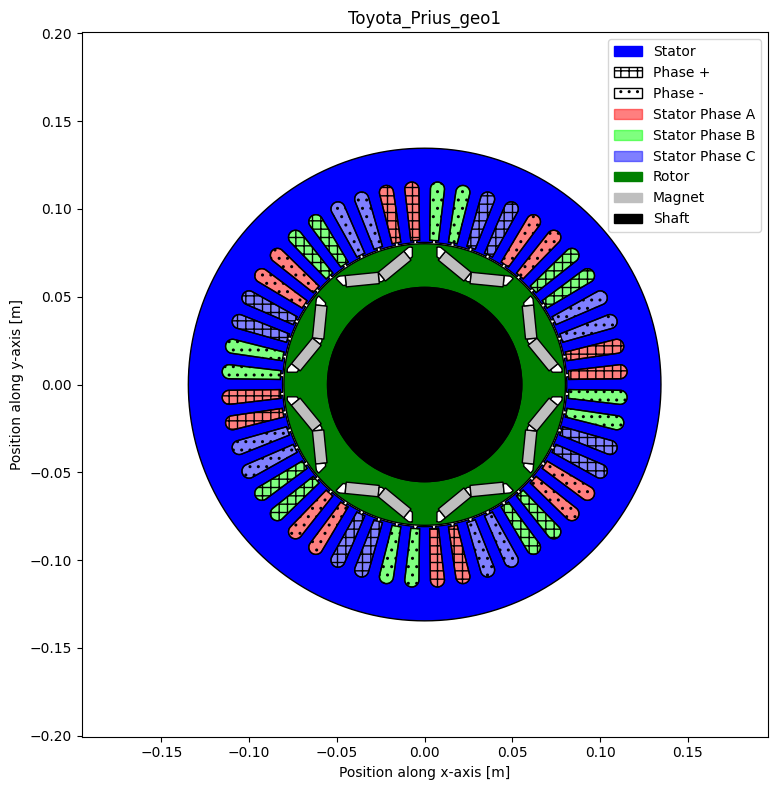

In [4]:
%matplotlib inline

# Load the machine
IPMSM_A = load("machines_custom_geom1/Toyota_Prius_geo1.json")
# In Jupyter notebook, we set is_show_fig=False to skip call to fig.show() to avoid a warning message
# All plot methods return the corresponding matplotlib figure and axis to further edit the resulting plot
fig, ax = IPMSM_A.plot(is_show_fig=False)
plt.show()

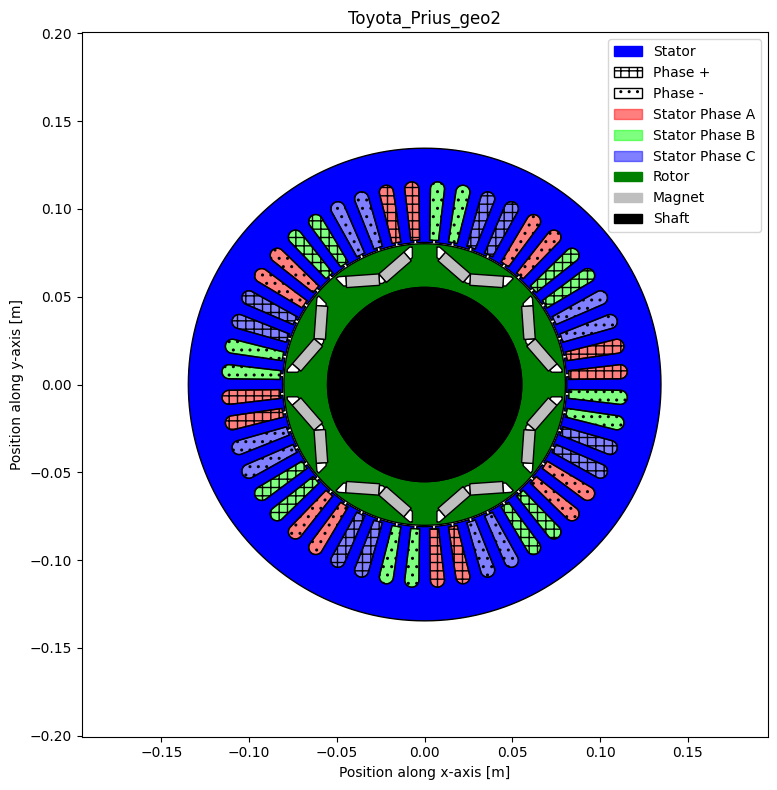

In [5]:
%matplotlib inline

# Load the machine
IPMSM_B = load("machines_custom_geom1/Toyota_Prius_geo2.json")
# In Jupyter notebook, we set is_show_fig=False to skip call to fig.show() to avoid a warning message
# All plot methods return the corresponding matplotlib figure and axis to further edit the resulting plot
fig, ax = IPMSM_B.plot(is_show_fig=False)
plt.show()

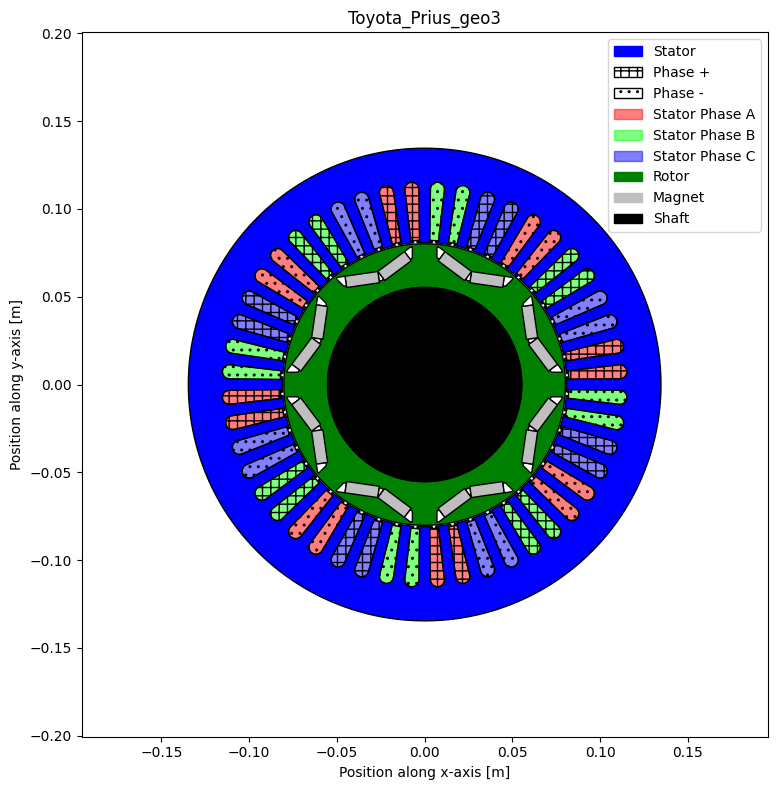

In [8]:
%matplotlib inline

# Load the machine
IPMSM_B = load("machines_custom_geom1/Toyota_Prius_geo3.json")
# In Jupyter notebook, we set is_show_fig=False to skip call to fig.show() to avoid a warning message
# All plot methods return the corresponding matplotlib figure and axis to further edit the resulting plot
fig, ax = IPMSM_B.plot(is_show_fig=False)
plt.show()

In [6]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_geom1 = load("machines_custom_geom1/Toyota_Prius_geo1.json")
machine_geom2 = load("machines_custom_geom1/Toyota_Prius_geo2.json")
machine_geom3= load("machines_custom_geom1/Toyota_Prius_geo3.json")

In [7]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_geom1 = load_simulation(name="geom1", machine=machine_geom1, rotor_speed=3000, stop=1, num_steps=4000)
simu_geom2 = load_simulation(name="geom2", machine=machine_geom2, rotor_speed=3000, stop=1, num_steps=4000)
simu_geom3 = load_simulation(name="geom3", machine=machine_geom3, rotor_speed=3000, stop=1, num_steps=4000)

[11:34:03] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[11:34:03] Starting Magnetic module
[11:34:08] Computing Airgap Flux in FEMM
[11:34:52] End of simulation FEMM_simulation
[11:34:52] Starting running simulation FEMM_simulation (machine=Toyota_Prius_geo1)
[11:34:52] Starting Magnetic module
[11:34:58] Computing Airgap Flux in FEMM
[11:35:45] End of simulation FEMM_simulation
[11:35:45] Starting running simulation FEMM_simulation (machine=Toyota_Prius_geo2)
[11:35:45] Starting Magnetic module
[11:35:51] Computing Airgap Flux in FEMM
[11:36:38] End of simulation FEMM_simulation
[11:36:39] Starting running simulation FEMM_simulation (machine=Toyota_Prius_geo3)
[11:36:39] Starting Magnetic module
[11:36:43] Computing Airgap Flux in FEMM
[11:37:25] End of simulation FEMM_simulation


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:539: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


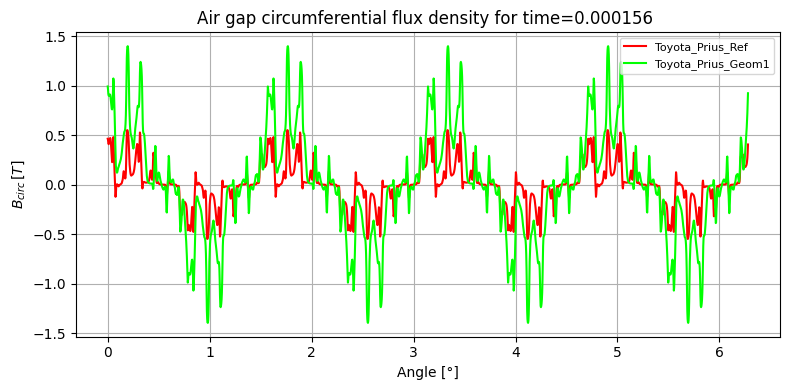

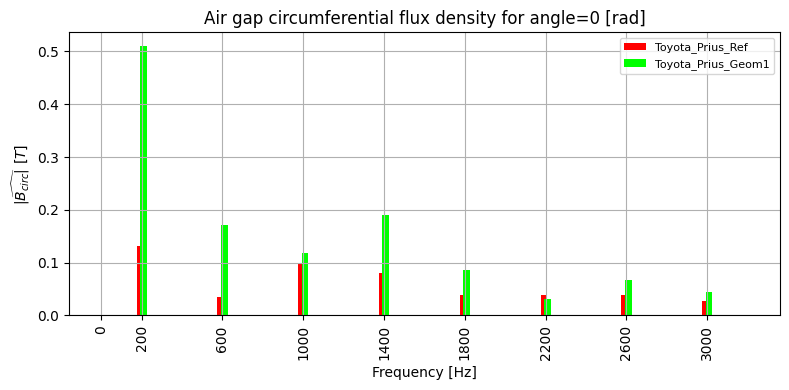

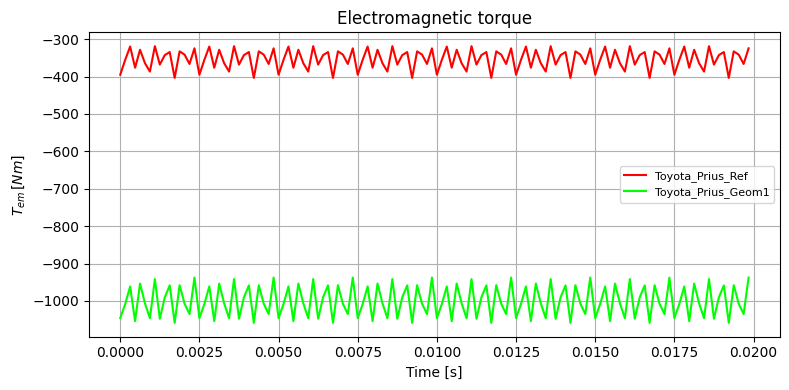

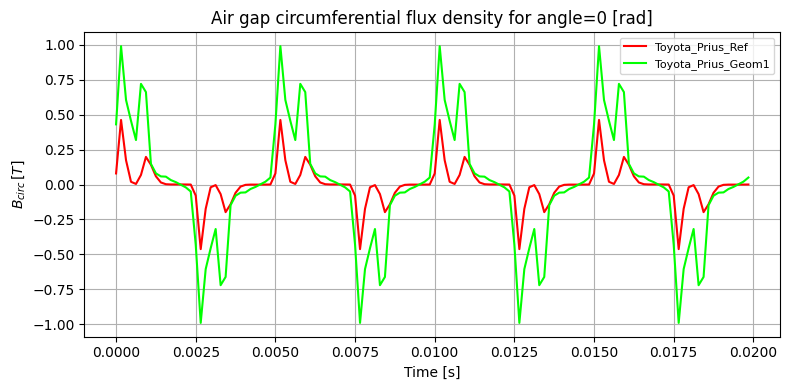

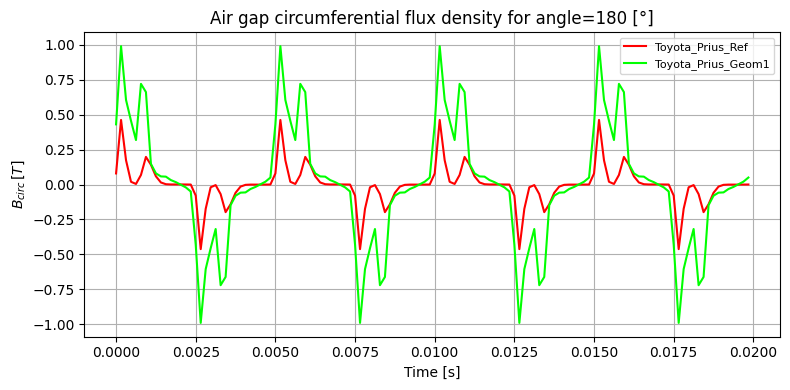

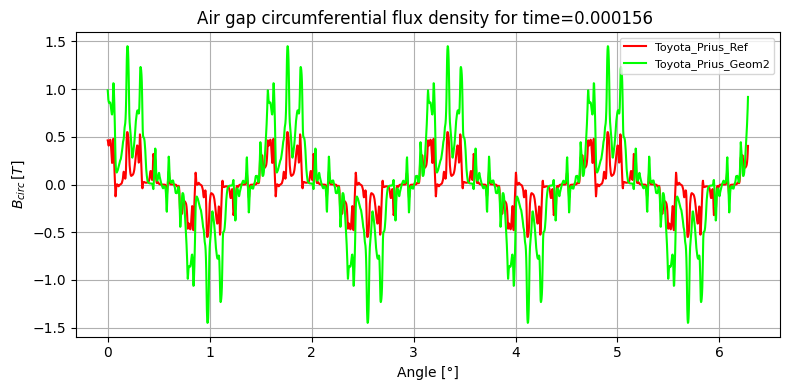

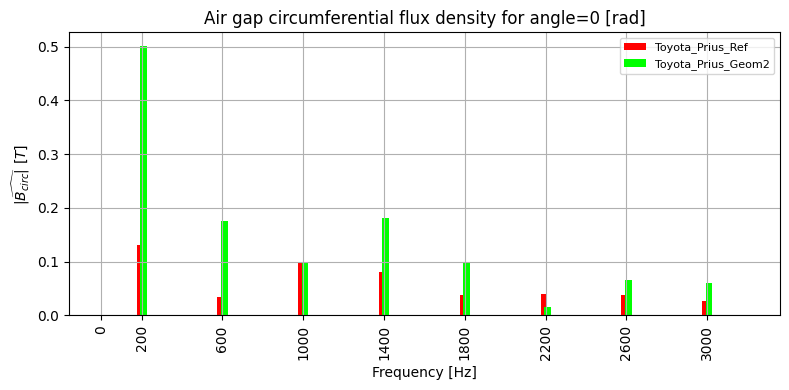

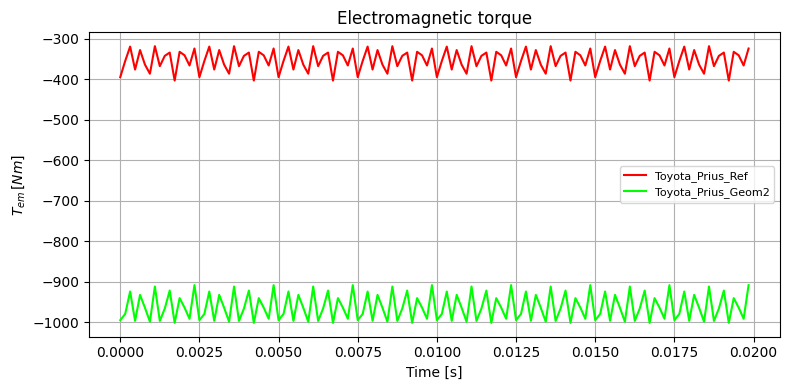

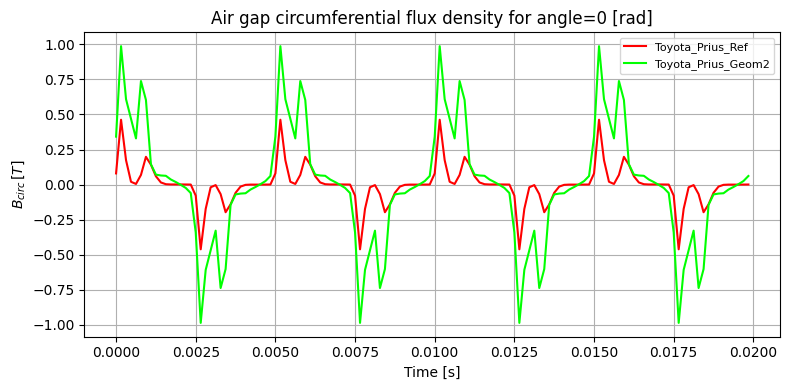

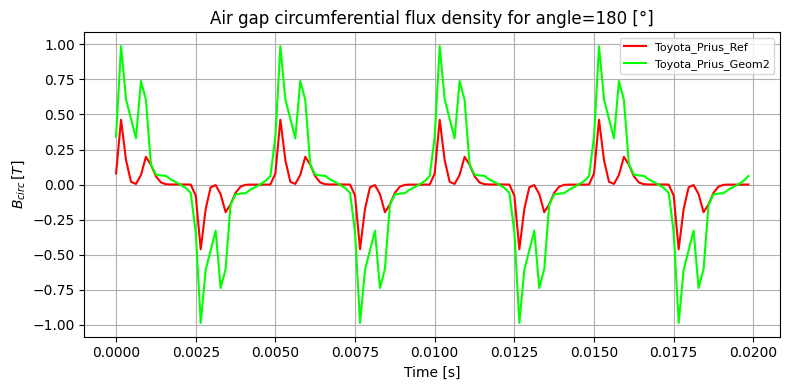

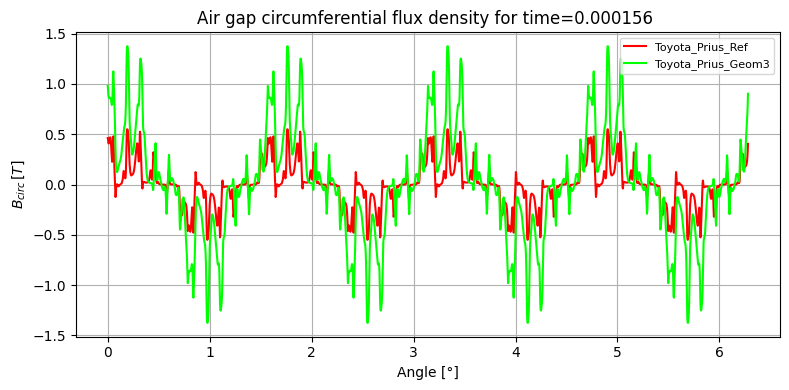

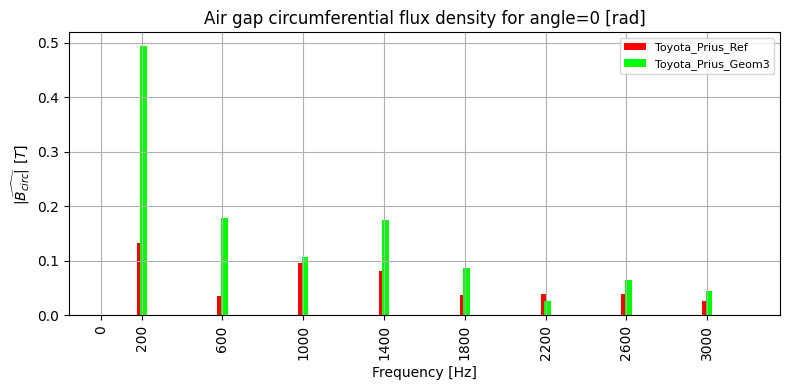

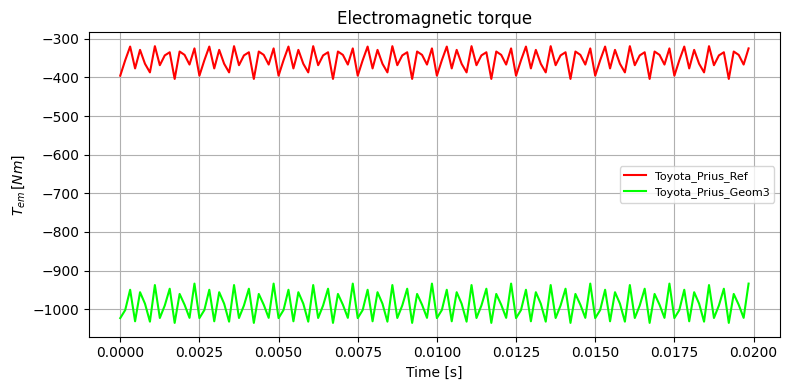

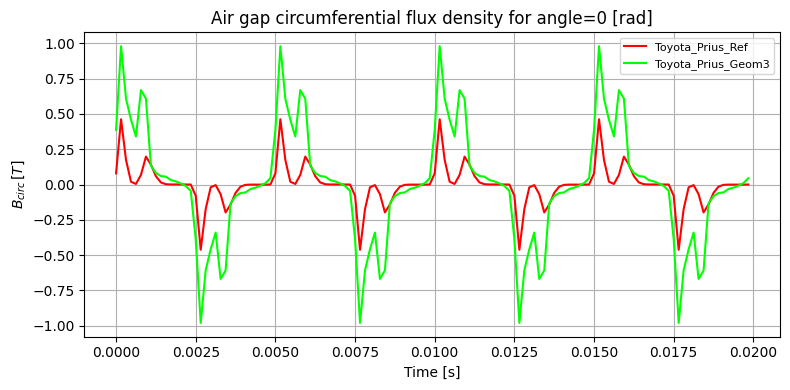

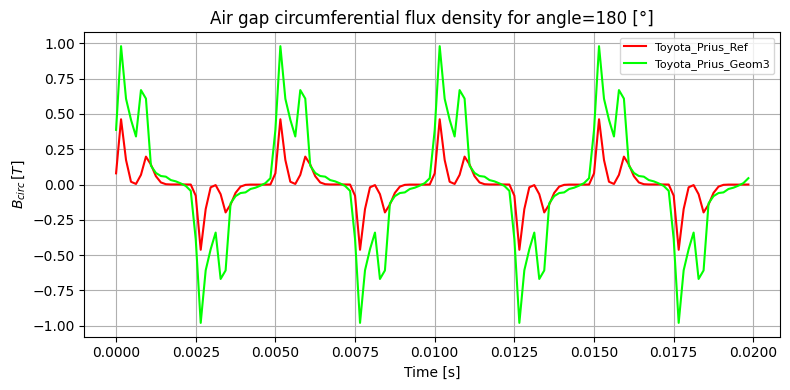

In [8]:
out_ref = simu_ref.run()
out_geom1 = simu_geom1.run()
out_geom2 = simu_geom2.run()
out_geom3 = simu_geom3.run()

# --- Comparaison des résultats ---
compare_simulation_results(
    out1=out_ref,
    out2=out_geom1,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_Geom1"]
)

compare_simulation_results(
    out1=out_ref,
    out2=out_geom2,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_Geom2"]
)

compare_simulation_results(
    out1=out_ref,
    out2=out_geom3,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_Geom3"]
)


In [9]:
out_geom1.save(save_path='machines_custom_geom1/simul_geom1', is_folder=True, type_handle_old=2, type_compression=0)

[11:38:45] Saving Material in machines_custom_geom1\simul_geom1\Material.json
[11:38:45] Saving M400-50A in machines_custom_geom1\simul_geom1\M400-50A.json
[11:38:45] Saving M400-50A in machines_custom_geom1\simul_geom1\M400-50A_00001.json
[11:38:45] Saving Air in machines_custom_geom1\simul_geom1\Air.json
[11:38:45] Saving MagnetPrius in machines_custom_geom1\simul_geom1\MagnetPrius.json
[11:38:45] Saving MagnetPrius in machines_custom_geom1\simul_geom1\MagnetPrius_00001.json
[11:38:45] Saving M400-50A in machines_custom_geom1\simul_geom1\M400-50A_00002.json
[11:38:45] Saving Copper1 in machines_custom_geom1\simul_geom1\Copper1.json
[11:38:45] Saving Material in machines_custom_geom1\simul_geom1\Material_00001.json
[11:38:45] Saving Toyota_Prius_geo1 in machines_custom_geom1\simul_geom1\Toyota_Prius_geo1.json
[11:38:45] Saving FEMM_simulation in machines_custom_geom1\simul_geom1\FEMM_simulation.json
[11:38:46] Saving Output to folder 'machines_custom_geom1\simul_geom1' (12 files).
Sav

In [10]:
out_geom2.save(save_path='machines_custom_geom1/simul_geom2', is_folder=True, type_handle_old=2, type_compression=0)

[11:39:06] Saving Material in machines_custom_geom1\simul_geom2\Material.json
[11:39:06] Saving M400-50A in machines_custom_geom1\simul_geom2\M400-50A.json
[11:39:06] Saving M400-50A in machines_custom_geom1\simul_geom2\M400-50A_00001.json
[11:39:06] Saving Air in machines_custom_geom1\simul_geom2\Air.json
[11:39:06] Saving MagnetPrius in machines_custom_geom1\simul_geom2\MagnetPrius.json
[11:39:06] Saving MagnetPrius in machines_custom_geom1\simul_geom2\MagnetPrius_00001.json
[11:39:06] Saving M400-50A in machines_custom_geom1\simul_geom2\M400-50A_00002.json
[11:39:06] Saving Copper1 in machines_custom_geom1\simul_geom2\Copper1.json
[11:39:06] Saving Material in machines_custom_geom1\simul_geom2\Material_00001.json
[11:39:06] Saving Toyota_Prius_geo2 in machines_custom_geom1\simul_geom2\Toyota_Prius_geo2.json
[11:39:06] Saving FEMM_simulation in machines_custom_geom1\simul_geom2\FEMM_simulation.json
[11:39:07] Saving Output to folder 'machines_custom_geom1\simul_geom2' (12 files).
Sav

In [11]:
out_geom3.save(save_path='machines_custom_geom1/simul_geom', is_folder=True, type_handle_old=2, type_compression=0)

[11:39:21] Saving Material in machines_custom_geom1\simul_geom\Material.json
[11:39:21] Saving M400-50A in machines_custom_geom1\simul_geom\M400-50A.json
[11:39:21] Saving M400-50A in machines_custom_geom1\simul_geom\M400-50A_00001.json
[11:39:21] Saving Air in machines_custom_geom1\simul_geom\Air.json
[11:39:21] Saving MagnetPrius in machines_custom_geom1\simul_geom\MagnetPrius.json
[11:39:21] Saving MagnetPrius in machines_custom_geom1\simul_geom\MagnetPrius_00001.json
[11:39:21] Saving M400-50A in machines_custom_geom1\simul_geom\M400-50A_00002.json
[11:39:21] Saving Copper1 in machines_custom_geom1\simul_geom\Copper1.json
[11:39:21] Saving Material in machines_custom_geom1\simul_geom\Material_00001.json
[11:39:21] Saving Toyota_Prius_geo3 in machines_custom_geom1\simul_geom\Toyota_Prius_geo3.json
[11:39:21] Saving FEMM_simulation in machines_custom_geom1\simul_geom\FEMM_simulation.json
[11:39:22] Saving Output to folder 'machines_custom_geom1\simul_geom' (12 files).
Saving Output t

In [ ]:
------------------------------------------------------------------------------------